# Submission Belajar Machine Learning untuk Pemula

## Import Library yang dibutuhkan

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Mengambil data yang akan digunakan

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-12 02:16:30--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.93MB/s    in 56s     

2020-06-12 02:17:28 (5.48 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## Ekstraksi data file zip

In [0]:
import zipfile
import os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

## Split folder untuk data latih dan data uji

In [4]:
!pip install split-folders

In [5]:
import split_folders

split_folders.ratio('/tmp/rockpaperscissors', output='/tmp/datasets', seed=1337, ratio=(.9, .1))

Copying files: 2189 files [00:00, 2557.78 files/s]


In [0]:
base_dir = '/tmp/datasets'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [7]:
print(os.listdir('/tmp/datasets/train'))
print(os.listdir('/tmp/datasets/val'))

['rock', 'rps-cv-images', 'scissors', 'paper']
['rock', 'rps-cv-images', 'scissors', 'paper']


In [0]:
os.rmdir('/tmp/datasets/train/rps-cv-images')

In [0]:
import shutil

shutil.rmtree('/tmp/datasets/val/rps-cv-images')

In [10]:
print(os.listdir('/tmp/datasets/train'))
print(os.listdir('/tmp/datasets/val'))

['rock', 'scissors', 'paper']
['rock', 'scissors', 'paper']


## Membuat sub direktori untuk setiap kelas pada data latih dan data uji

In [0]:
train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')

val_paper_dir = os.path.join(val_dir, 'paper')
val_rock_dir = os.path.join(val_dir, 'rock')
val_scissors_dir = os.path.join(val_dir, 'scissors')

In [13]:
num_paper_tr = len(os.listdir(train_paper_dir))
num_rock_tr = len(os.listdir(train_rock_dir))
num_scissors_tr = len(os.listdir(train_scissors_dir))

num_paper_val = len(os.listdir(val_paper_dir))
num_rock_val = len(os.listdir(val_rock_dir))
num_scissors_val = len(os.listdir(val_scissors_dir))

print('total training paper images:', num_paper_tr)
print('total training rock images:', num_rock_tr)
print('total training scissors images:', num_scissors_tr)

print('total validation paper images:', num_paper_val)
print('total validation rock images:', num_rock_val)
print('total validation scissors images:', num_scissors_val)

total training paper images: 640
total training rock images: 653
total training scissors images: 675
total validation paper images: 72
total validation rock images: 73
total validation scissors images: 75


## Augmentasi gambar

In [0]:
train_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range = 0.2,
                  fill_mode = 'nearest')

val_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range = 0.2,
                  fill_mode = 'nearest')

## Membuat objek image data generator

In [15]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), 
        batch_size=32,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150), 
        batch_size=32,
        class_mode='categorical')

Found 1968 images belonging to 3 classes.
Found 220 images belonging to 3 classes.


## Membangun arsitektur CNN

In [0]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.5), 
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

## Malatih model

In [19]:
model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=10, 
      validation_data=val_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/10
25/25 - 43s - loss: 0.7487 - accuracy: 0.7100 - val_loss: 0.7436 - val_accuracy: 0.7250
Epoch 2/10
25/25 - 42s - loss: 0.6333 - accuracy: 0.7588 - val_loss: 0.6195 - val_accuracy: 0.7750
Epoch 3/10
25/25 - 42s - loss: 0.5001 - accuracy: 0.8355 - val_loss: 0.5252 - val_accuracy: 0.8188
Epoch 4/10
25/25 - 42s - loss: 0.4609 - accuracy: 0.8457 - val_loss: 0.4633 - val_accuracy: 0.8313
Epoch 5/10
25/25 - 46s - loss: 0.3772 - accuracy: 0.8700 - val_loss: 0.3886 - val_accuracy: 0.8562
Epoch 6/10
25/25 - 43s - loss: 0.3390 - accuracy: 0.8863 - val_loss: 0.3210 - val_accuracy: 0.8938
Epoch 7/10
25/25 - 43s - loss: 0.2845 - accuracy: 0.9075 - val_loss: 0.3102 - val_accuracy: 0.9000
Epoch 8/10
25/25 - 42s - loss: 0.2541 - accuracy: 0.9145 - val_loss: 0.2875 - val_accuracy: 0.9125
Epoch 9/10
25/25 - 42s - loss: 0.2070 - accuracy: 0.9300 - val_loss: 0.1957 - val_accuracy: 0.9500
Epoch 10/10
25/25 - 42s - loss: 0.1816 - accuracy: 0.9477 - val_loss: 0.2492 - val_accuracy: 0.9187


## Prediksi model

Using TensorFlow backend.


Saving IMG_20200612_042739.jpg to IMG_20200612_042739.jpg
IMG_20200612_042739.jpg
scissors


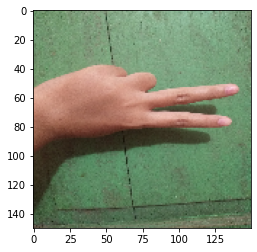

In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  else:
    print('scissors')